# Task: Build an Artificial Neural Network to identify the customers who will be leaving the bank, based on the data of all customers over the past three months.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential

2025-04-25 14:11:43.838976: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 14:11:43.839627: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 14:11:43.841880: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 14:11:43.847770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745608303.858124   28740 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745608303.86

## Task A:
### Load the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

Row Numbers: Row numbers from 1 to 10000

CustomerId: Unique IDs for bank customer identification 

Surname: Customer’s Last Name 

CreditScore: Credit score of the customer 

Geography: The country that the customer
belongs to

Gender: Male or Female

Age: Age of the customer

Tenure: Number of years for which the customer has been with the bank

Balance: Bank balance of the customer

NumOfProducts: Number of bank products the customer is using

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop the customers' personal data columns that will not be useful for analysis. (Hint: First three columns)

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

### Prepare independent variables X and dependent variable Y (Exited).

In [6]:
X = df.drop('Exited', axis=1)
y = df['Exited']

### LabelEncode the Gender column

In [7]:
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

### OneHotEncode the Geography column

In [8]:
X_geo = pd.get_dummies(X['Geography'], prefix='encoded', drop_first=True).astype(int)

In [9]:
X.drop('Geography', axis=1, inplace=True)
X = pd.concat([X_geo,X], axis=1)
X.head()

,encoded_Germany,encoded_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,619,0,42,2,0.00,1,1,1,101348.88
1,0,1,608,0,41,1,83807.86,1,0,1,112542.58
2,0,0,502,0,42,8,159660.80,3,1,0,113931.57
3,0,0,699,0,39,1,0.00,2,0,0,93826.63
4,0,1,850,0,43,2,125510.82,1,1,1,79084.10


### Perform a train test split in the ratio 80:20 and random_state 0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Build a Keras Sequential model with the following layers:

• Dense layer with 6 neurons and activation relu

• Dense layer with 1 neuron and activation sigmoid

• Compile the model with Adam optimizer, binary_crossentropy loss and metric accuracy

In [12]:
ANN_model = Sequential([
    layers.Dense(6, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(1, activation='sigmoid')
])

ANN_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

/home/cullen-fedora/Documents/Python-Projects/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-25 14:11:45.320054: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Train the model for 10 epochs and batch size 10

In [13]:
history = ANN_model.fit(X_train_scaled, y_train, validation_split=0.1, batch_size=10, epochs=10)

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.6192 - loss: 0.6717 - val_accuracy: 0.8250 - val_loss: 0.4912
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8156 - loss: 0.4742 - val_accuracy: 0.8275 - val_loss: 0.4342
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.8145 - loss: 0.4375 - val_accuracy: 0.8375 - val_loss: 0.4069
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8302 - loss: 0.4077 - val_accuracy: 0.8413 - val_loss: 0.3878
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8337 - loss: 0.3950 - val_accuracy: 0.8425 - val_loss: 0.3752
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.8423 - loss: 0.3805 - val_accuracy: 0.8487 - val_loss: 0.3668
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8374 - loss: 0.3746 - val_accuracy: 0.8462 - val_loss: 0.3581
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8460 - loss: 0.3680 - 

### Evaluate the model on the test set; print the accuracy and confusion matrix

In [14]:
y_predict = ANN_model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


For binary classification, left is above 50% probability

In [15]:
y_predict = (y_predict > 0.5).astype(int)

In [16]:
accuracy = accuracy_score(y_pred=y_predict, y_true= y_test)
print(f"Accuracy of model: {accuracy*100:.2f}%")

Accuracy of model: 85.55%


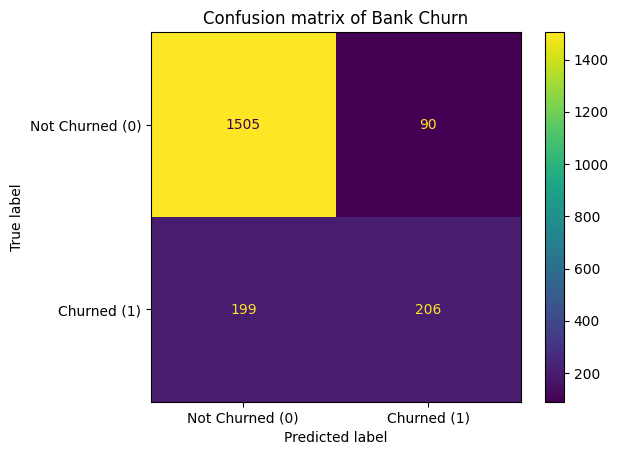

In [17]:
confu_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
display = ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Not Churned (0)', 'Churned (1)'])
display.plot()
plt.title('Confusion matrix of Bank Churn')
plt.show()

In [18]:
c_report = classification_report(y_true=y_test, y_pred=y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.70      0.51      0.59       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Max. Training Accuracy 0.851111114025116
Max. Validation Accuracy 0.8612499833106995


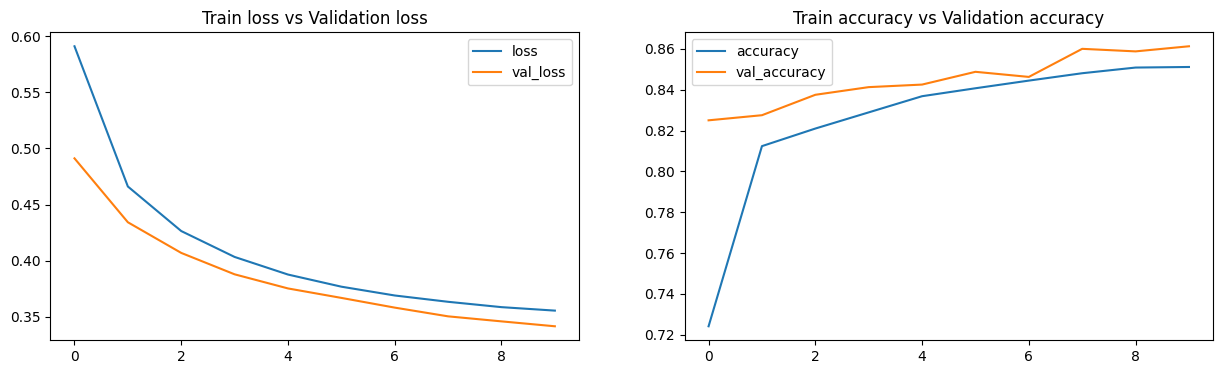

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].legend(['loss', 'val_loss'])
ax[0].title.set_text('Train loss vs Validation loss')

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].legend(['accuracy', 'val_accuracy'])
ax[1].title.set_text('Train accuracy vs Validation accuracy')

print('Max. Training Accuracy', max(history.history['accuracy']))
print('Max. Validation Accuracy', max(history.history['val_accuracy']))
plt.show()

#### Observations
- Training loss and validation loss decrease steadily and may seemingly level off beyond the 10 epochs

- Training accuracy and validation accuracy exhibit steady improvement as well

- Classification report shows a 85% overall accuracy on testing set

- Classification report also shows that the model struggled with it's sensitivity in identifying customers who would churn at 51%

- Training the model with more epochs and other hyperparameter tuning might improve sensitivity

## Task B:

### Use the built ANN model to predict if the customer with the following information will leave the bank:

• Geography: France

• Credit Score: 600

• Gender: Male

• Age: 40 years

• Tenure: 3 years

• Balance: $60000

• Number of Products: 2

• Does this customer have a credit card? Yes

• Is this customer an Active Member: Yes

• Estimated Salary: $50000

So, should we let the customer go?

In [20]:
X_test.columns # for order of data input

Index(['encoded_Germany', 'encoded_Spain', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [21]:
customer = {
    'encoded_Germany': 0,
      'encoded_Spain': 0, 
      'CreditScore': 600, 
      'Gender': 40, 
      'Age': 40,
      'Tenure': 3, 
      'Balance': 60000, 
      'NumOfProducts': 2, 
      'HasCrCard': 1, 
      'IsActiveMember': 1,
      'EstimatedSalary': 50000
}

In [22]:
customer = pd.DataFrame([customer])
customer_scaled = scaler.transform(customer)

In [23]:
customer_predict = ANN_model.predict(customer_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [24]:
print(f'Probability result: {customer_predict}')
if customer_predict > 0.5:
    print('Customer will likely churn')
else: 
    print('Customer will likely NOT Churn')

Probability result: [[7.514296e-08]]
Customer will likely NOT Churn
